In [4]:
import sys
sys.path.append('../')
import numpy as np
from scanHelpers import getPoints
import glob
import imp
import plotScan
import matplotlib as mpl
params = {'xtick.labelsize' : 15,'ytick.labelsize' : 15, 'axes.labelsize' : 20, 'figure.figsize' : (15,10)}
mpl.rcParams.update(params)

In [2]:
parsExpr = ["blocks['EXTPAR'][23]","blocks['EXTPAR'][1]",
            "blocks['EXTPAR'][2]","abs(blocks['MASS'][1000024]) - abs(blocks['MASS'][1000022])",
            "abs(blocks['MASS'][1000024])","decays[1000024].totalwidth"]
slhaFolder = '../data/gauginos/slha_tanb10/'
points,slhaFiles = getPoints(parsExpr,slhaFolder)
for mcmcFolder in glob.glob('../data/gauginos/slha_tanb10/mcmc_*/'):
    mcmcPoints,mcmcFiles = getPoints(parsExpr,mcmcFolder)
    points = np.concatenate((points,mcmcPoints))
    slhaFiles = np.concatenate((slhaFiles,mcmcFiles))

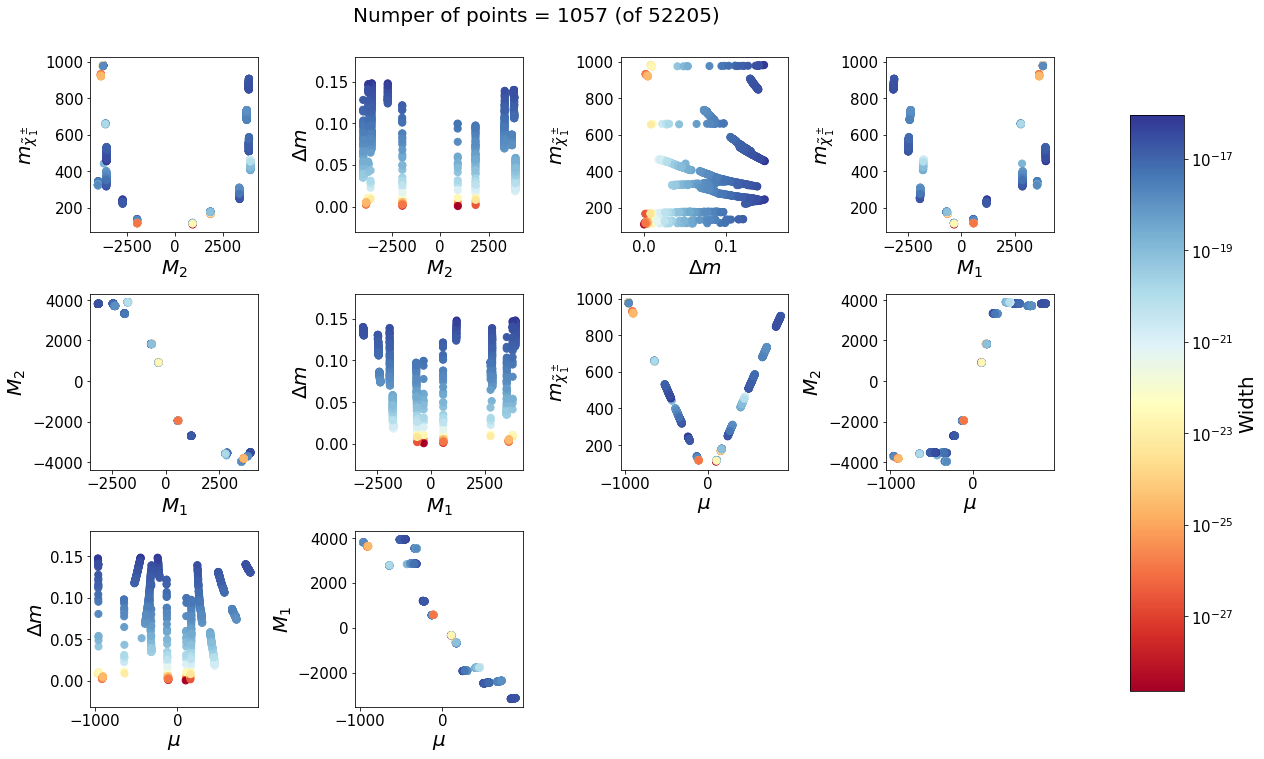

In [14]:
pars = {r'$\mu$' : 0 , r'$M_1$' : 1,  r'$M_2$' : 2, r'$\Delta m$' : 3, r'$m_{\tilde\chi_1^\pm}$' : 4}
coloraxis = {'Width' : -1}
subset = points[points[:,-1]>0.]
subset = subset[subset[:,-1]<1e-16]
subset = subset[subset[:,4]<1000.]
fig = plotScan.plotScan(subset,pars,coloraxis,doLog=True,doLines=False)
fig.suptitle('Numper of points = %i (of %i)' %(len(subset),len(points)),y=1.05,fontsize=20)
fig.show()

101
(9.84740072e-17, '->', 9.5485908e-17)


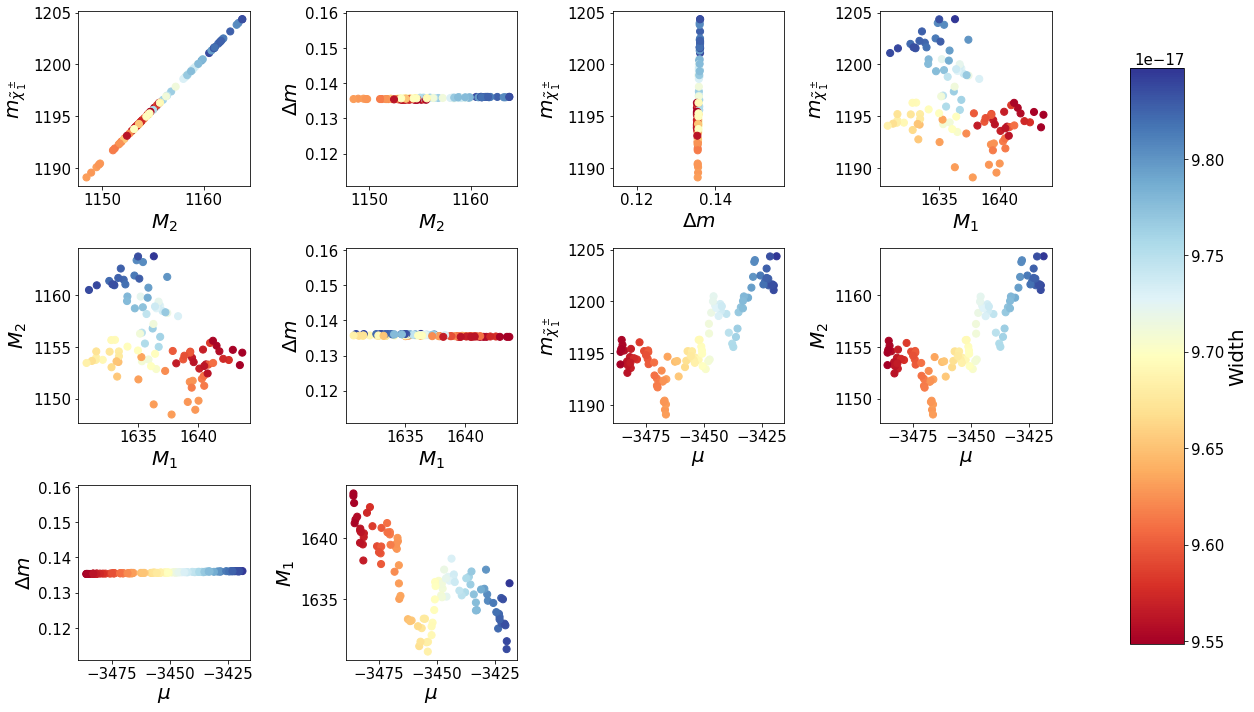

In [79]:
mcmcFolder = '../data/gauginos/slha_tanb10/mcmc_100/'
mcmcPoints,mcmcFiles = getPoints(parsExpr,mcmcFolder)
subset = mcmcPoints[mcmcPoints[:,-1]>0.]
print(len(subset))
print(max(subset[:,-1]),'->',min(subset[:,-1]))
# subset = subset[subset[:,-1]<1e-15]
# subset = subset[subset[:,4]<1000.]
fig = plotScan.plotScan(subset,pars,coloraxis,doLog=False,doLines=False)
fig.show()